# Model Development

In [20]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


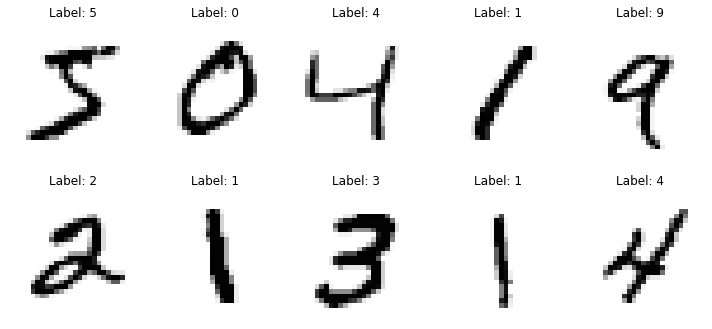

In [0]:
fig, axes = plt.subplots(2, 5, figsize=(10,5))
axes = axes.flatten()
for img, label, ax in zip(X_train[:10], Y_train[:10], axes):
    ax.imshow(img, cmap='Greys')
    ax.axis('off')
    ax.set_title('Label: ' + str(label))
plt.tight_layout()
plt.show()

In [0]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_train[0].shape)

X_train = X_train / 255
X_test = X_test / 255

(28, 28, 1)


In [0]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 
model.save("model.h5")

history = model.fit(X_train,Y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.2114 - accuracy: 0.9367
Epoch 2/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.0865 - accuracy: 0.9734
Epoch 3/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.0601 - accuracy: 0.9810
Epoch 4/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0476 - accuracy: 0.9848
Epoch 5/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.0375 - accuracy: 0.9877


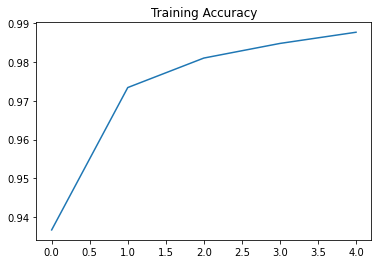

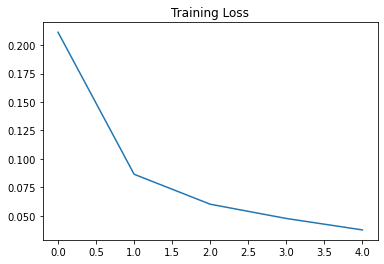

In [0]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(5)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.show()

plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.show()

In [0]:
loss, acc = model.evaluate(X_test, Y_test)
print("Testing Loss:", loss)
print("Testing Accuracy:", acc)

10000/10000 [==============================] - 1s 56us/step
Testing Loss: 0.0532138827809511
Testing Accuracy: 0.9832000136375427


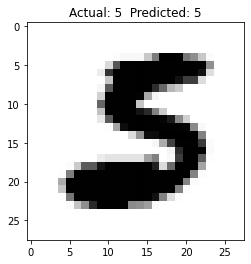

In [0]:
image_index = 7777
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Actual: {}  Predicted: {}".format(Y_test[image_index], pred.argmax()))
plt.show()

# Using the Model

In [2]:
from keras.models import load_model
model = load_model('model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [3]:
from PIL import Image, ImageOps
import numpy as np

image = Image.open('sample_image.png')
image = image.resize((28, 28)) # Resizing Image
image = image.convert('L') # Grey Scaling Image
image = ImageOps.invert(image) # Invert Grey Scale
img = np.array(image)
res = model.predict(img.reshape(-1, 28, 28, 1))
print("Prediction:", res.argmax())

Prediction: 8
